In [178]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import os


In [179]:
#Check's for PostgreSQL.py configuration file, if non, it will generate one.
#NOTICE -- Please configure API/PostgreSQL.py before running all code. Ensure it is added to 'gitignore' before running code and pushing to the repository
#ADDITIONALLY -- If the strings get renamed, simply delete 'PostgreSQL.py' and re-run this code.
# This code was grabbed from previous projects
sqlconfig = os.path.join("API","PostgreSQL.py")

if not os.path.exists(sqlconfig):
    with open(sqlconfig, 'w') as file:
        file.write("connectionString = ''")
    print(f"Configuration file has been created, please configure, restart kernel and try again.")
else:
    print(f"Configuration file already exists, importing...")
    
from API.PostgreSQL import *

Configuration file already exists, importing...


In [180]:
# Load data from the SQL server
engine = create_engine(connectionString)
Session = sessionmaker(bind=engine)
tableName = "RedWineData"

RedWineDF = pd.read_sql_table(tableName, engine)
RedWineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [181]:
RedWineDF.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [182]:
print(RedWineDF.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


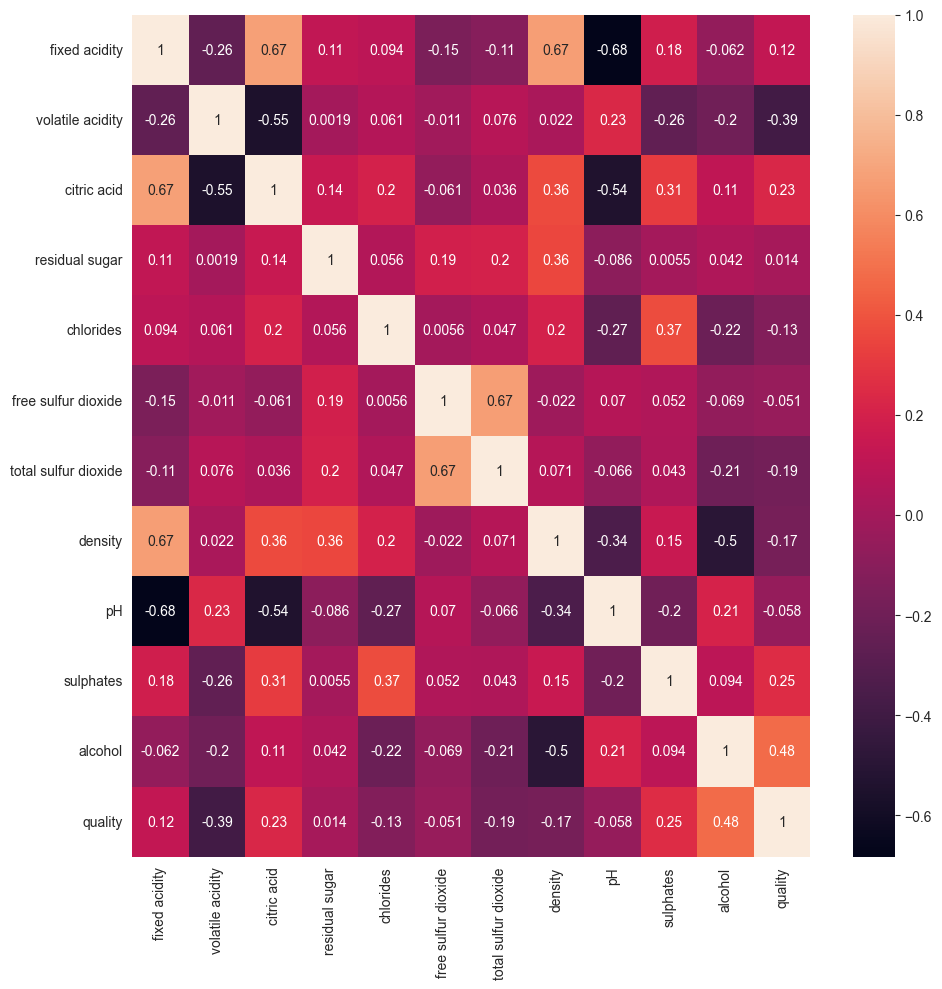

In [183]:
import seaborn as sns
# Cool correlation matrix graph
corrMatrix = RedWineDF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.tight_layout()
plt.savefig("visualizations/CorrelationMatrix.png", dpi=300, transparent=True)
plt.show()




In [208]:
RedWineDF['quality'] = RedWineDF['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [209]:
# Split into X and y
X = RedWineDF.drop('quality', axis=1).copy()
y = RedWineDF['quality'].copy()



In [210]:
# Import tensorflow
import tensorflow as tf


In [211]:
# Import sklearn train test split
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [212]:
from sklearn.preprocessing import StandardScaler
# scaling features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [213]:
# Keras model using GPU
numberInputFeatures = X_train.shape[1]
layerNodes = 256
layerNodes2 = 128
layerNodes3 = 64
layerNodes4 = 32


model = tf.keras.models.Sequential()

# Layer 1
model.add(tf.keras.layers.Dense(units=layerNodes, input_dim=numberInputFeatures, activation='relu'))
model.add(tf.keras.layers.Dense(units=layerNodes2, input_dim=numberInputFeatures, activation='relu'))
model.add(tf.keras.layers.Dense(units=layerNodes3, activation='relu'))
model.add(tf.keras.layers.Dense(units=layerNodes4, activation='relu'))

# Output
model.add(tf.keras.layers.Dense(units=1, input_dim=numberInputFeatures, activation='sigmoid'))

# Check the structure of the model
model.summary()

C:\Users\nolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

In [214]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [237]:
# Train model using GPU
fit_model = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5618 - loss: 25.0570
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.5892 - loss: 0.7938
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.6263 - loss: 0.8032
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5964 - loss: 0.7263
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.6143 - loss: 0.7047
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.6428 - loss: 0.6445
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6467 - loss: 0.6154
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.6287 - loss: 0.6383
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6388 - loss: 0.6440
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.6132 - loss: 0.6267
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.6412 - loss: 0.6070
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 

In [238]:
# Performance / accuracy validation
model.evaluate(X_test_scaled,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.6845 - loss: 1.8241


[2.3739755153656006, 0.6575000286102295]

In [239]:
model.save('ModelExport/WineDeepLearning.h5')

In [240]:
predictions = model.predict(X)
predictions = pd.DataFrame(predictions).reset_index(drop=True)
predictions

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


,0
0,0.281471
1,0.447560
2,0.445796
3,0.484114
4,0.281471
...,...
1594,0.617180
1595,0.940274
1596,0.934606
1597,0.524039


In [241]:

RedWineDF['predicted_quality'] = predictions.round().astype(int)
RedWineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,1


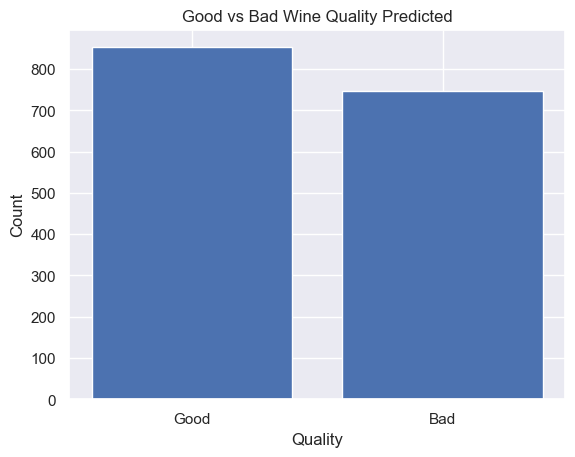

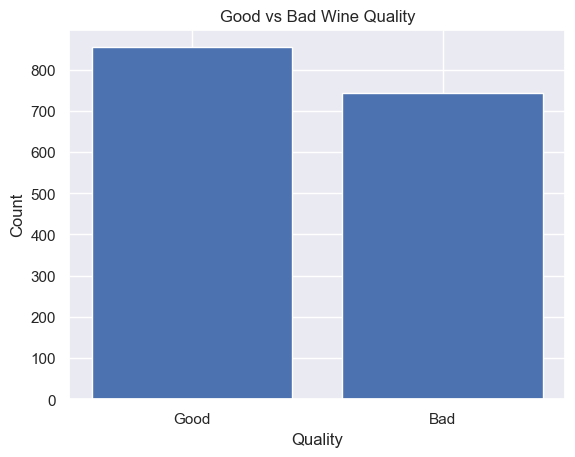

In [244]:
good_wines = RedWineDF[RedWineDF['predicted_quality'] == 1].shape[0]
bad_wines = RedWineDF[RedWineDF['predicted_quality'] == 0].shape[0]

plt.bar(['Good', 'Bad'], [good_wines, bad_wines])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Good vs Bad Wine Quality Predicted')
plt.savefig("visualizations/Good vs Bad Predicted.png", dpi=300, transparent=True)
plt.show()

good_wines = RedWineDF[RedWineDF['quality'] == 1].shape[0]
bad_wines = RedWineDF[RedWineDF['quality'] == 0].shape[0]

plt.bar(['Good', 'Bad'], [good_wines, bad_wines])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Good vs Bad Wine Quality')
plt.savefig("visualizations/Good vs Bad True.png", dpi=300, transparent=True)
plt.show()

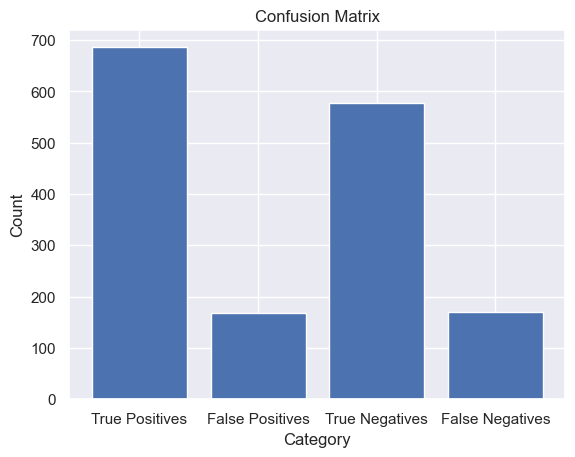

In [247]:
TP = len(RedWineDF[(RedWineDF['quality'] == 1) & (RedWineDF['predicted_quality'] == 1)])
FP = len(RedWineDF[(RedWineDF['quality'] == 0) & (RedWineDF['predicted_quality'] == 1)])
TN = len(RedWineDF[(RedWineDF['quality'] == 0) & (RedWineDF['predicted_quality'] == 0)])
FN = len(RedWineDF[(RedWineDF['quality'] == 1) & (RedWineDF['predicted_quality'] == 0)])

labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
counts = [TP, FP, TN, FN]

plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Confusion Matrix')
plt.show()